In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor

%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
dftrain = pd.read_csv('../input/titanic/train.csv')
dfeval  = pd.read_csv('../input/titanic/test.csv')
combine = [dftrain , dfeval]

In [3]:
dftrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print('Train Data Info')
dftrain.info()

Train Data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
dftrain.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
dftrain.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [7]:
# Missed Values
print('Train Missed Values')
print(dftrain.isna().sum())
print('\nEval Missed Values')
print(dfeval.isna().sum())

Train Missed Values
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Eval Missed Values
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


<AxesSubplot:>

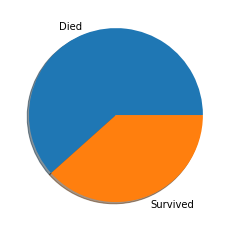

In [8]:
#Survived
dftrain['Survived'].replace({0:"Died",1:"Survived"}).value_counts().plot.pie(shadow=True,ylabel='')

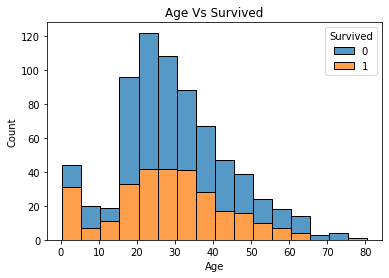

In [9]:
sns.histplot(data=dftrain, x='Age',hue="Survived",binwidth=5,multiple='stack').set_title("Age Vs Survived")
plt.show()

Text(0.5, 0, '%Survive')

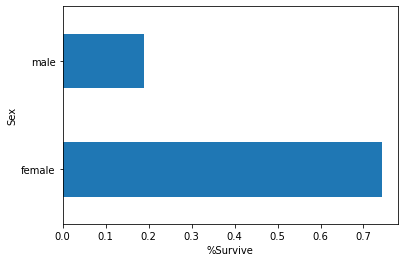

In [10]:
#Sex correlation with Survived:
dftrain.groupby('Sex').Survived.mean().plot(kind='barh').set_xlabel('%Survive')

Text(0.5, 0, '%survive')

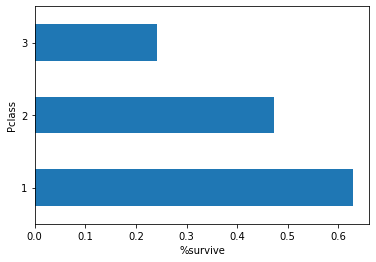

In [11]:
##class correlation 
dftrain.groupby('Pclass').Survived.mean().plot(kind='barh').set_xlabel('%survive')

Text(0.5, 0, '%survive')

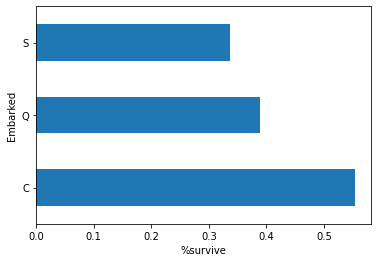

In [12]:
#embarked correlation 
dftrain.groupby('Embarked').Survived.mean().plot(kind='barh').set_xlabel('%survive')

Text(0.5, 0, '%survive')

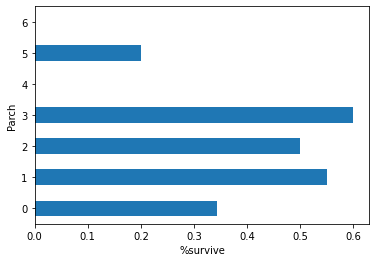

In [13]:
#Parch correlation 
dftrain.groupby('Parch').Survived.mean().plot(kind='barh').set_xlabel('%survive')

Text(0.5, 0, '%survive')

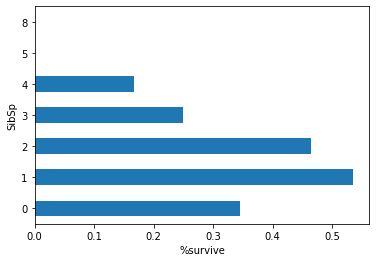

In [14]:
#Sibsp correlation 
dftrain.groupby('SibSp').Survived.mean().plot(kind='barh').set_xlabel('%survive')

# Data Wrangling

In [15]:
# dropping unuseful features:
dftrain.drop(columns = ["PassengerId"] , inplace = True)
for dataset in combine:
    dataset.drop(columns = ["Ticket" , "Cabin"] , inplace = True)
print("Dropping features Done !!")

Dropping features Done !!


In [16]:
#replace missing values
dftrain.Embarked.fillna(dftrain.Embarked.dropna().max(), inplace=True)
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].dropna().map({'S':0,'C':1,'Q':2}).astype(int)

In [17]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int) 

In [18]:
#replace missing ages with median, using sex and class
guess_ages = np.zeros((2,3))
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                           (dataset['Pclass'] == j+1)]['Age'].dropna()
            age_guess = guess_df.median()
            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
    print(guess_ages)
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                'Age'] = guess_ages[i,j]
    dataset['Age'] = dataset['Age'].astype(int)

[[40.  30.  25. ]
 [35.  28.  21.5]]
[[42. 28. 24.]
 [41. 24. 22.]]


In [19]:
dfeval[dfeval['Fare'].isna()]
dfeval.Fare.fillna(dfeval.Fare.dropna().median() , inplace= True)

In [20]:
dftrain.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [21]:
dfeval.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

# Correlation

In [22]:
#Correlation with the target:
dftrain.corr()['Survived'].sort_values(ascending=False)

Survived    1.000000
Sex         0.543351
Fare        0.257307
Embarked    0.106811
Parch       0.081629
SibSp      -0.035322
Age        -0.060291
Pclass     -0.338481
Name: Survived, dtype: float64

<AxesSubplot:>

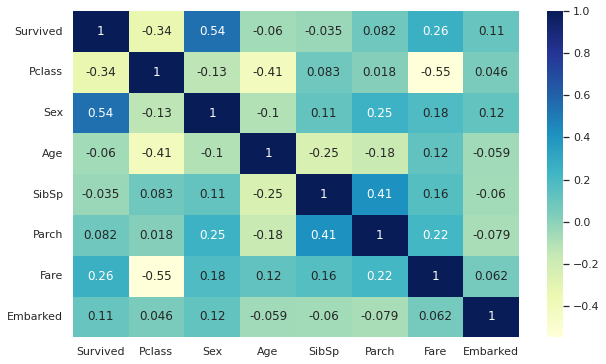

In [23]:
#correlation between all our features
sns.set(rc = {'figure.figsize':(10,6)})
sns.heatmap(dftrain.corr(), annot = True, fmt='.2g',cmap= 'YlGnBu')

In [24]:
# Not alone data frame i.e. the passenger has either a sibling or a parent.
# Parch: num. of parents / children aboard 
# SibSp: num. of siblings / spouses aboard 
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
dftrain.drop(['Parch', 'SibSp'], axis=1 , inplace = True)
dfeval.drop(['Parch', 'SibSp'], axis=1 , inplace = True)    
dftrain[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [25]:
for dataset in combine:
    dataset['Alone'] = dataset['FamilySize'].map(lambda s: 1 if s == 1 else 0)
    dataset['SmallF'] = dataset['FamilySize'].map(lambda s: 1 if  s == 2  else 0)
    dataset['MedF'] = dataset['FamilySize'].map(lambda s: 1 if 3 <= s <= 4 else 0)
    dataset['LargeF'] = dataset['FamilySize'].map(lambda s: 1 if s >= 5 else 0)    
dftrain.drop(columns = ["FamilySize"] , inplace = True)
dfeval.drop(columns = ["FamilySize"] , inplace = True)

Text(0.5, 0, '%survive')

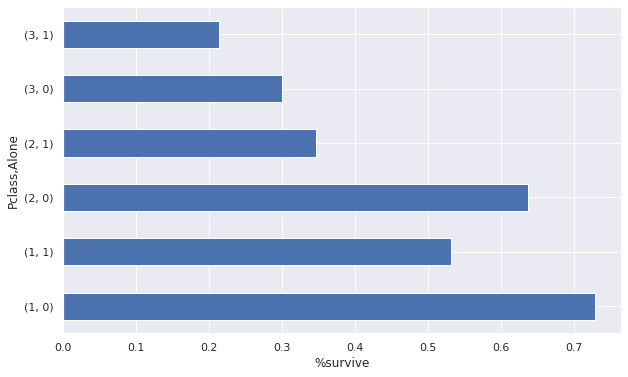

In [26]:
dftrain.groupby(['Pclass','Alone']).Survived.mean().plot(kind='barh').set_xlabel('%survive')

In [27]:
dftrain.Age.value_counts()

25    117
21     66
30     36
40     36
24     31
     ... 
12      1
53      1
80      1
66      1
74      1
Name: Age, Length: 71, dtype: int64

In [28]:
dftrain['AgeBand'] = pd.cut(dftrain['Age'], 5)
dftrain[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [29]:
#Age group:
for dataset in combine:  
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4
dftrain.drop(['AgeBand'], axis=1 , inplace = True)

Text(0.5, 0, '%survive')

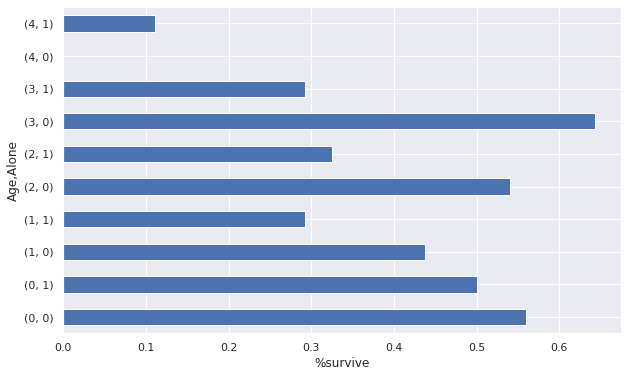

In [30]:
dftrain.groupby(['Age','Alone']).Survived.mean().plot(kind='barh').set_xlabel('%survive')

In [31]:
dftrain.Fare.unique()

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
        31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,  18.    ,
         7.225 ,  26.    ,   8.0292,  35.5   ,  31.3875, 263.    ,
         7.8792,   7.8958,  27.7208, 146.5208,   7.75  ,  10.5   ,
        82.1708,  52.    ,   7.2292,  11.2417,   9.475 ,  21.    ,
        41.5792,  15.5   ,  21.6792,  17.8   ,  39.6875,   7.8   ,
        76.7292,  61.9792,  27.75  ,  46.9   ,  80.    ,  83.475 ,
        27.9   ,  15.2458,   8.1583,   8.6625,  73.5   ,  14.4542,
        56.4958,   7.65  ,  29.    ,  12.475 ,   9.    ,   9.5   ,
         7.7875,  47.1   ,  15.85  ,  34.375 ,  61.175 ,  20.575 ,
        34.6542,  63.3583,  23.    ,  77.2875,   8.6542,   7.775 ,
        24.15  ,   9.825 ,  14.4583, 247.5208,   7.1417,  22.3583,
         6.975 ,   7.05  ,  14.5   ,  15.0458,  26.2833,   9.2167,
        79.2   ,   6.75  ,  11.5   ,  36.75  ,   7.7958,  12.5

In [32]:
dftrain['FareBand'] = pd.qcut(dftrain['Fare'], 4, duplicates='drop')
dftrain[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=False)


,FareBand,Survived
3,"(31.0, 512.329]",0.581081
2,"(14.454, 31.0]",0.454955
1,"(7.91, 14.454]",0.303571
0,"(-0.001, 7.91]",0.197309


In [33]:
# Fare Group:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
dftrain.drop(['FareBand'], axis=1 , inplace = True)


Text(0.5, 0, '%Survive')

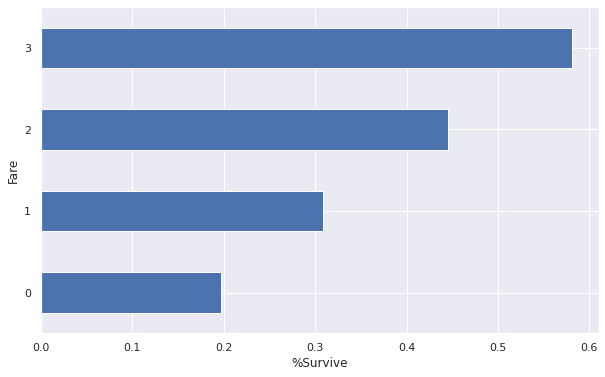

In [34]:
#Fare -> strong positive 
dftrain.groupby(['Fare']).Survived.mean().plot(kind='barh').set_xlabel('%Survive')

In [35]:
# Name Title
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
dftrain.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [36]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
    'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
dftrain.drop(['Name'], axis=1 , inplace = True)
dfeval.drop(['Name'], axis=1 , inplace = True) 

dftrain.Title.unique()


array([1, 3, 2, 4, 5])

In [37]:
dftrain.corr()["Survived"].sort_values(ascending=False)


Survived    1.000000
Sex         0.543351
Title       0.407753
Fare        0.295875
MedF        0.193662
SmallF      0.163157
Embarked    0.106811
Age        -0.037059
LargeF     -0.125147
Alone      -0.203367
Pclass     -0.338481
Name: Survived, dtype: float64

<AxesSubplot:>

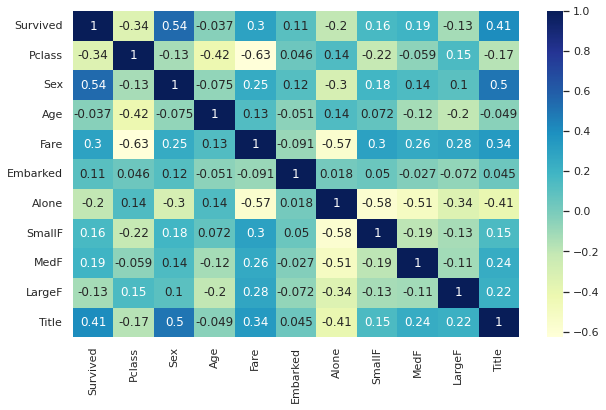

In [38]:
sns.set(rc = {'figure.figsize':(10,6)})
sns.heatmap(dftrain.corr(), annot = True, fmt='.2g',cmap= 'YlGnBu')

In [39]:
df_gptest = dftrain[['Sex','Pclass','Survived']]
df_group = df_gptest.groupby(['Sex','Pclass'],as_index=False).mean()
df_group

,Sex,Pclass,Survived
0,0,1,0.368852
1,0,2,0.157407
2,0,3,0.135447
3,1,1,0.968085
4,1,2,0.921053
5,1,3,0.500000


In [40]:
grouped_pivot = df_group.pivot(index='Sex',columns='Pclass')
grouped_pivot

Survived                    
Pclass         1         2         3
Sex                                 
0       0.368852  0.157407  0.135447
1       0.968085  0.921053  0.500000

In [41]:
grouped_Pclass=df_gptest[['Pclass', 'Survived']].groupby(['Pclass'])
grouped_Pclass.head(2)

,Pclass,Survived
0,3,0
1,1,1
2,3,1
3,1,1
9,2,1
15,2,1


In [42]:
fval, pval = stats.f_oneway(grouped_Pclass.get_group(1)['Survived'],grouped_Pclass.get_group(2)['Survived'],grouped_Pclass.get_group(3)['Survived'])
print('fval=', fval, 'Pval = ', pval)

fval= 57.964817590910116 Pval =  2.1832474151179777e-24


In [43]:
fval, pval = stats.f_oneway(grouped_Pclass.get_group(1)['Survived'],grouped_Pclass.get_group(2)['Survived'])
print('fval=', fval, 'Pval = ', pval)

fval= 10.103587293685537 Pval =  0.0015954656668377672


In [44]:
fval, pval = stats.f_oneway(grouped_Pclass.get_group(1)['Survived'],grouped_Pclass.get_group(3)['Survived'])
print('fval=', fval, 'Pval = ', pval)

fval= 112.86505470741152 Pval =  1.4803959119906348e-24


In [45]:
fval, pval = stats.f_oneway(grouped_Pclass.get_group(2)['Survived'],grouped_Pclass.get_group(3)['Survived'])
print('fval=', fval, 'Pval = ', pval)

fval= 35.17246675282538 Pval =  4.824799495145908e-09


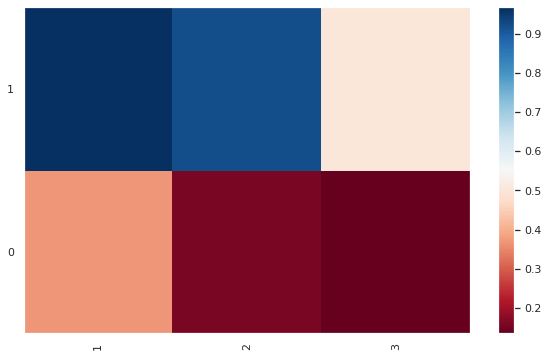

In [46]:
grouped_pivot = df_group.pivot(index='Sex',columns='Pclass')
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')
#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index
#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)
#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)
#rotate label if too long
plt.xticks(rotation=90)
fig.colorbar(im)
plt.show()

In [47]:
grouped_Sex=df_gptest[['Sex', 'Survived']].groupby(['Sex'])
grouped_Sex.head(2)

,Sex,Survived
0,0,0
1,1,1
2,1,1
4,0,0


In [48]:
grouped_Sex.get_group(0)['Survived']

0      0
4      0
5      0
6      0
7      0
      ..
883    0
884    0
886    0
889    1
890    0
Name: Survived, Length: 577, dtype: int64

In [49]:
fval, pval = stats.f_oneway(grouped_Sex.get_group(0)['Survived'],grouped_Sex.get_group(1)['Survived'])
print('fval=', fval, 'Pval = ', pval)

fval= 372.4057236022147 Pval =  1.406066130879677e-69


In [50]:
grouped_SexPc = df_gptest.groupby(['Sex','Pclass'],as_index=False)
grouped_SexPc.head(2)
grouped_SexPc.get_group((0,1))['Survived']


6      0
23     1
27     0
30     0
34     0
      ..
839    1
857    1
867    0
872    0
889    1
Name: Survived, Length: 122, dtype: int64

In [51]:
fval, pval = stats.f_oneway(grouped_SexPc.get_group((0,1))['Survived'],grouped_SexPc.get_group((1,1))['Survived'])
print('fval=', fval, 'Pval = ', pval)

fval= 130.32043470259032 Pval =  6.969691682457197e-24


In [52]:
cont_table = pd.crosstab(dftrain['Age'], dftrain['Alone']) 
#then we use the chi2_contingency in the scipy.stats library: 
stats.chi2_contingency(cont_table, correction = True)

(100.11135297834939,
 9.314079656127385e-21,
 4,
 array([[ 39.73063973,  60.26936027],
        [196.66666667, 298.33333333],
        [ 85.81818182, 130.18181818],
        [ 27.41414141,  41.58585859],
        [  4.37037037,   6.62962963]]))

# DecisionTreeRegressor

In [53]:
feature_names = ["Pclass", "Sex", "Alone", "Title",'Fare','LargeF','Age','Embarked','MedF','SmallF']
dtr_model = DecisionTreeRegressor(random_state=0)
y = dftrain.Survived
X = dftrain[feature_names]
# Fit model
dtr_model.fit(X, y)
# Predict
dtr_predictions = dtr_model.predict(X)

In [54]:
print("Making predictions for the following 5 passengers:")
print(X.head())
print("The predictions are:",dtr_predictions[:5])
print('Actual:',y[:5].tolist())

Making predictions for the following 5 passengers:
   Pclass  Sex  Alone  Title  Fare  LargeF  Age  Embarked  MedF  SmallF
0       3    0      0      1     0       0    1         0     0       1
1       1    1      0      3     3       0    2         1     0       1
2       3    1      1      2     1       0    1         0     0       0
3       1    1      0      3     3       0    2         0     0       1
4       3    0      1      1     1       0    2         0     0       0
The predictions are: [0.14285714 1.         0.36363636 1.         0.1875    ]
Actual: [0, 1, 1, 1, 0]


In [55]:
mean_absolute_error(y, dtr_predictions)

0.16384486045559837

In [56]:
# split data into training and validation data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
# Define model
dtr_model = DecisionTreeRegressor(random_state=0)
# Fit model
dtr_model.fit(train_X, train_y)
# get predicted validation data
val_predictions = dtr_model.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))

0.2115772555535922


In [57]:
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

In [58]:
# compare MAE with differing values of max_leaf_nodes
for max_leaf_nodes in [None, 5, 50, 100,500]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %s  \t\t Mean Absolute Error:  %0.4f" %(max_leaf_nodes, my_mae))    

Max leaf nodes: None  		 Mean Absolute Error:  0.2116
Max leaf nodes: 5  		 Mean Absolute Error:  0.2817
Max leaf nodes: 50  		 Mean Absolute Error:  0.2282
Max leaf nodes: 100  		 Mean Absolute Error:  0.2186
Max leaf nodes: 500  		 Mean Absolute Error:  0.2156


## RandomForestRegressor

In [59]:
rfr_model = RandomForestRegressor(random_state=1)
feature_names = ["Pclass", "Sex", "Alone", "Title",'Fare','LargeF','Age','Embarked']
#,'MedF','SmallF']
X = dftrain[feature_names]
y = dftrain.Survived
rfr_model.fit(X, y)
predictions = rfr_model.predict(X)
mean_absolute_error(y, predictions)

0.1910630421770291

In [60]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
rfr_model = RandomForestRegressor(random_state=0)
rfr_model.fit(train_X, train_y)
# get predicted values on validation data
rfr_preds = rfr_model.predict(val_X)
mean_absolute_error(val_y, rfr_preds)

0.22592291301194775

In [61]:
def get_rfr_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = RandomForestRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

In [62]:
# compare MAE with differing values of max_leaf_nodes
for max_leaf_nodes in [None, 5, 50, 100,500]:
    my_mae = get_rfr_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %s  \t\t Mean Absolute Error:  %0.4f" %(max_leaf_nodes, my_mae))    

Max leaf nodes: None  		 Mean Absolute Error:  0.2259
Max leaf nodes: 5  		 Mean Absolute Error:  0.2786
Max leaf nodes: 50  		 Mean Absolute Error:  0.2299
Max leaf nodes: 100  		 Mean Absolute Error:  0.2253
Max leaf nodes: 500  		 Mean Absolute Error:  0.2253


# Output

In [63]:
predictions = rfr_model.predict(dfeval[feature_names])
print("Making predictions for the following 5 passengers:")
print(dfeval[feature_names].head())
print("The predictions are:",predictions[:5])

Making predictions for the following 5 passengers:
   Pclass  Sex  Alone  Title  Fare  LargeF  Age  Embarked
0       3    0      1      1     0       0    2         2
1       3    1      0      3     0       0    2         0
2       2    0      1      1     1       0    3         2
3       3    0      1      1     1       0    1         0
4       3    1      0      3     1       0    1         0
The predictions are: [0.00143541 0.41819048 0.13       0.15915245 0.67846429]


In [64]:
output = pd.DataFrame({'PassengerId': dfeval.PassengerId, 'Survived': predictions})
output.to_csv('submission2.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
